In [2]:
import pandas as pd
import seaborn as sns

# reads in the data
data = pd.read_csv('u.data', names=['user_id', 'item_id', 'rating', 'timestamp'], sep='\t')
user = pd.read_csv('u.user', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'], sep='|')
item = pd.read_csv('u.item', names=['movie_id', 'movie_title', 'release_date', 
                                   'video_release_date', 'IMDB_url', 'unknown', 'Action', 'Adventure', 'Animation',
                                  'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
                                  'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
                                    'War', 'Western'], sep='|')

/home/yohoos/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# a) Number_of_unique_movies 
#    Number_of_unique_users 
print 'Number of unique movies: ', len(item['movie_id'].unique())
print 'Number of unique users: ', len(user['user_id'].unique())

Number of unique movies:  1682
Number of unique users:  943


In [4]:
# b) Get top 5 movies with the largest number of ratings

# find rating counts for each movie
ratings_group = data.groupby(data['item_id'])
counts = ratings_group.count()
rating_counts = counts.sort_values('rating', ascending=False)['rating']
best_moves = rating_counts[rating_counts > 100]

# series of movie_id, movie_title
projection = item[['movie_id', 'movie_title']]
movie_titles = pd.Series(data=projection['movie_title'], index=projection['movie_id'])

movies_by_rating = pd.concat([best_moves, movie_titles], join='inner', axis=1)
top5_movies = movies_by_rating.sort_values('rating', ascending=False).head()
top5_movies = top5_movies[['movie_title', 'rating']]
print top5_movies.head().to_string(index=False)

                 movie_title  rating
  Legends of the Fall (1994)     583
 George of the Jungle (1997)     509
          Heavy Metal (1981)     508
           GoodFellas (1990)     507
            Breakdown (1997)     485


In [5]:
# c) Average user Age by Movie

data_user_join = pd.merge(data, user, on='user_id')
user_groups = data_user_join.groupby(data_user_join['item_id'])
avg_age = user_groups.mean().sort_values('age', ascending=True)['age']
# avg_age.head()

final_merge = pd.concat([avg_age, best_moves, movie_titles], join='inner', axis=1).sort_values('age')
final_merge = final_merge[['movie_title', 'rating', 'age']]
print final_merge.head().to_string(index=False)

                            movie_title  rating        age
                    If Lucy Fell (1996)     149  26.617450
                          Psycho (1960)     116  27.181034
 Aladdin and the King of Thieves (1996)     106  27.707547
                       Lone Star (1996)     115  27.904348
            Sweet Hereafter, The (1997)     106  27.962264


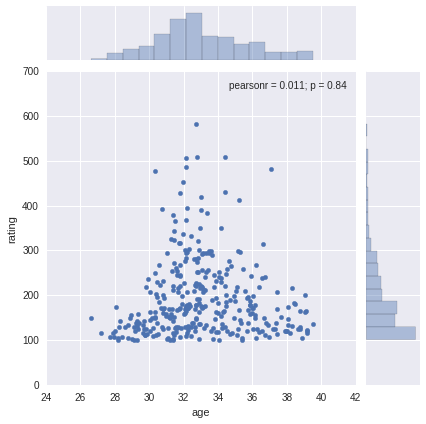

In [30]:
#  d) Seaborn visualization

%matplotlib inline
sns.jointplot(x='age', y='rating', data=final_merge[['age', 'rating']])

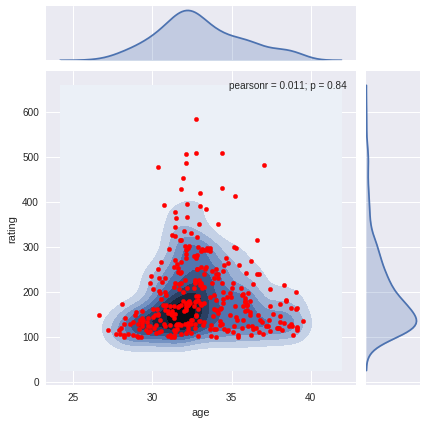

In [31]:
# e) density plot
import matplotlib.pyplot as plt

dens = sns.jointplot(x='age', y='rating', data=final_merge[['age', 'rating']], kind='kde')
dens.plot_joint(plt.scatter, color='red')